In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

In [10]:
file_path = []
label = []
import os
for image in os.listdir('SUIT_Dataset'):
    file_path.append(f'SUIT_Dataset/{image}')
    label.append(image)
sample_df = pd.DataFrame(zip(file_path, label), columns=['file_path', 'label'])
sample_df.head()

,file_path,label
0,SUIT_Dataset/SUT_C25_0105_000898_Lev1.0_2025-0...,SUT_C25_0105_000898_Lev1.0_2025-04-29T01.38.17...
1,SUIT_Dataset/SUT_C25_0105_000898_Lev1.0_2025-0...,SUT_C25_0105_000898_Lev1.0_2025-04-29T01.45.46...
2,SUIT_Dataset/SUT_C25_0105_000898_Lev1.0_2025-0...,SUT_C25_0105_000898_Lev1.0_2025-04-29T01.59.16...
3,SUIT_Dataset/SUT_T25_0589_000893_Lev1.0_2025-0...,SUT_T25_0589_000893_Lev1.0_2025-04-27T09.00.10...
4,SUIT_Dataset/SUT_T25_0589_000893_Lev1.0_2025-0...,SUT_T25_0589_000893_Lev1.0_2025-04-27T09.01.42...


In [11]:
sample_df['file_path'][0]

'SUIT_Dataset/SUT_C25_0105_000898_Lev1.0_2025-04-29T01.38.17.443_0972NB03.fits'

In [12]:
sample_df['label'][0]

'SUT_C25_0105_000898_Lev1.0_2025-04-29T01.38.17.443_0972NB03.fits'

In [14]:
len('T01.38.17.443_0972NB03.fits')

27

In [15]:
sample_df['file_path'][0][13:]

'SUT_C25_0105_000898_Lev1.0_2025-04-29T01.38.17.443_0972NB03.fits'

In [16]:
# convert into date time formate

def make_folder(folder_name):
    os.makedirs(folder_name, exist_ok=True)

# file transer
import shutil

def file_transer(source, destination):
    shutil.move(source, destination)

# move into new folder

for image in sample_df['file_path']:
    folder_name = image[40:-27]
    make_folder(f'fits_image/{folder_name}')
    file_transer(image, f'fits_image/{folder_name}/{image[13:]}')






In [ ]:
# open fits image
def open_fits_images(image_path):
    import sunpy.map
    with fits.open(image_path) as hdul:
        hdr = hdul[0].header
        # Patch the unit string if present
        for key in hdr:
            if isinstance(hdr[key], str) and 'milli-angstrom' in hdr[key]:
                hdr[key] = hdr[key].replace('milli-angstrom', 'angstrom')
        # Force CUNIT1 to 'arcsec' to satisfy SunPy Map requirements
        hdr['CUNIT1'] = 'arcsec'
        # Create the SunPy map from the patched HDU
        return sunpy.map.Map(hdul[0].data, hdr)
    
value = open_fits_images('SUT_T25_0253_000776_Lev1.0_2025-02-24T23.31.40.997_0972NB03.fits')

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Observatory,Aditya-L1
Instrument,SUIT
Detector,SUIT
Measurement,2796.0 Angstrom
Wavelength,2796.0 Angstrom
Observation Date,2025-02-24 23:31:40
Exposure Time,0.3 s
Dimension,[2048. 2048.] pix
Coordinate System,helioprojective
Scale,[1.396 1.396] arcsec / pix
Reference Pixel,[1279.6 608.6] pix

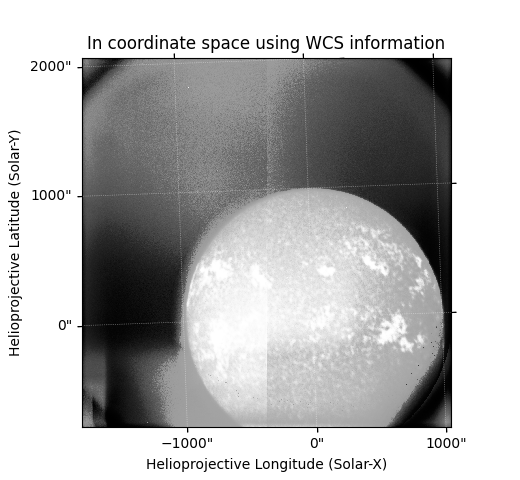
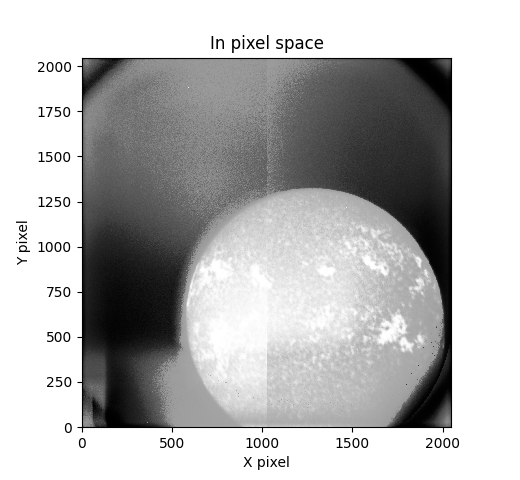
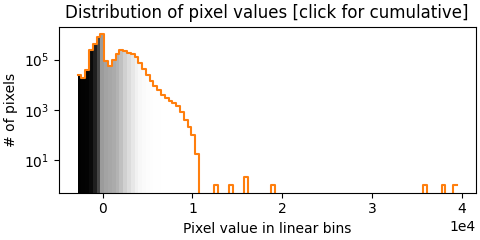
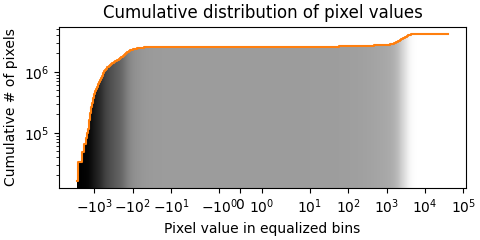

In [18]:
value

In [66]:
# value.date is a sunpy.time.Time object, use .datetime to get a Python datetime object, then .date()
import datetime
import sunpy.map
def open_fits_images(image_path):
    with fits.open(image_path) as hdul:
        hdr = hdul[0].header
        # Patch the unit string if present
        for key in hdr:
            if isinstance(hdr[key], str) and 'milli-angstrom' in hdr[key]:
                hdr[key] = hdr[key].replace('milli-angstrom', 'angstrom')
        # Force CUNIT1 to 'arcsec' to satisfy SunPy Map requirements
        hdr['CUNIT1'] = 'arcsec'
        # Create the SunPy map from the patched HDU
        return sunpy.map.Map(hdul[0].data, hdr)

def wavelength_from_image(image_path):
    # Get the wavelength as a string (e.g., '2796.0 Angstrom')
    wavelength = open_fits_images(image_path).wavelength
    # Convert to float first, then int
    return float(str(wavelength).split()[0])

def return_graph(image_path):
    return str(open_fits_images(image_path).Dimension)
return_graph('fits_image/2025-04-27/SUT_T25_0589_000893_Lev1.0_2025-04-27T09.00.10.848_0972NB03.fits')

AttributeError: 'SUITMap' object has no attribute 'Dimension'

In [20]:
meta_data = value.meta

In [29]:
# See available keys in meta_data
list(meta_data.keys())
meta_data['img_type']

'Normal'

In [72]:
from src.preprocessing import fits_data_operation
image_path = 'SUT_T25_0253_000776_Lev1.0_2025-02-24T23.31.40.997_0972NB03.fits'


ImportError: cannot import name 'fits_data_operation' from 'src.preprocessing' (c:\Users\harsh\Downloads\ISRO\src\preprocessing.py)

In [71]:
data_image = fits_data_operation()
data_image.return_graph(image_path)

NameError: name 'fits_data_operation' is not defined